In [1]:

import sklearn
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [2]:
# обучение однослойного персептрона
# без смещения
# создание класса

class Perceptron:
  #конструктор ИНС
    def __init__(self, input_count, output_count, learning_rate):
        self.input_count = input_count
        self.output_count = output_count
        self.final_outputs = None
        self.output_errors = None

        # создание весов нейронной сети
        # указываем центр распределения весов (0),
        # потом стандартное отклонение pow(self.input_count, -0.5)
        # после форму матрицы со случайными значениями(количество выходов, количество входов)
        self.weights = np.random.normal(0.0, pow(self.input_count, -0.5), (self.output_count, self.input_count))
        self.output = None
        self.learning_rate = learning_rate
        self.activation_function = scipy.special.expit

        # прогнозирование нейронной сетью
    def predict(self, inputs_list):
        # создание матрицы из входных значений
        inputs = np.array(inputs_list, ndmin=2).T
        # считаем сигнал, который поступает в нейроны
        final_inputs = np.dot(self.weights, inputs)
        # считаем сигнал, который испускают нейроны
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

        # обучение нейронной сети
    def train(self, inputs_list, targets_list):
        # создание матрицы из входных и выходных значений
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # считаем сигнал, который поступает в нейроны
        # self.weights = [[0.69132613]], inputs = [[1]]
        # final_inputs = [[0.69132613]]
        final_inputs = np.dot(self.weights, inputs)

        # считаем сигналы, которые испускают нейроны
        # final_outputs = [[0.66626187]]
        self.final_outputs = self.activation_function(final_inputs)

        # считаем ошибку прогноза
        # output_errors = [[0.33373813]]
        self.output_errors = targets - self.final_outputs

        # изменение веса равно[[0.0074209]]
        self.weights += self.learning_rate * np.dot((self.output_errors * self.final_outputs * (1.0 - self.final_outputs)),
                                                      np.transpose(inputs))



In [3]:
# создание нейронной сети
# устанавливаем количество входов и выходов
input_count = 1
output_count = 1

# устанавливаем значение скорости обучения
learning_rate = 0.1

# создаем персептрон
simple_perceptron = Perceptron(input_count, output_count, learning_rate)
simple_perceptron.weights

array([[-0.15703735]])

In [4]:
# обучение нейронной сети
# задача: обучить нейронную сеть определять, является ли число положительным
weights = {"positive": [], "negative": []}
outputs = {"positive": [], "negative": []}
output_errors = {"positive":[], "negative":[], "mean":[]}

X_train = [[1],
           [-1]]
y_train = [[1],
           [0]]
# проводим обучение персепторона
for epoch in range(10000):
  # показываем первый пример
    simple_perceptron.train(X_train[0], y_train[0])
    weights["positive"].append(simple_perceptron.weights.copy())
    outputs["positive"].append(simple_perceptron.final_outputs.copy())
    error_1 = simple_perceptron.output_errors.copy()
    output_errors["positive"].append(error_1)

  # показываем второй пример
    simple_perceptron.train(X_train[1], y_train[1])
    weights["negative"].append(simple_perceptron.weights.copy())
    weights["negative"].append(simple_perceptron.final_outputs.copy())
    error_2 = simple_perceptron.output_errors.copy()
    output_errors["negative"].append(error_2)

    output_errors["mean"].append(np.mean([error_1, error_2]))

In [5]:
epoch_weights = np.array(weights["negative"])
final_outputs = np.array(outputs["negative"])
epoch_errors = np.array(output_errors["mean"])

In [6]:
epoch_weights = epoch_weights.reshape(len(epoch_weights))
final_outputs = final_outputs.reshape(len(final_outputs))
epoch_errors = epoch_errors.reshape(len(epoch_errors))

<function matplotlib.pyplot.show(close=None, block=None)>

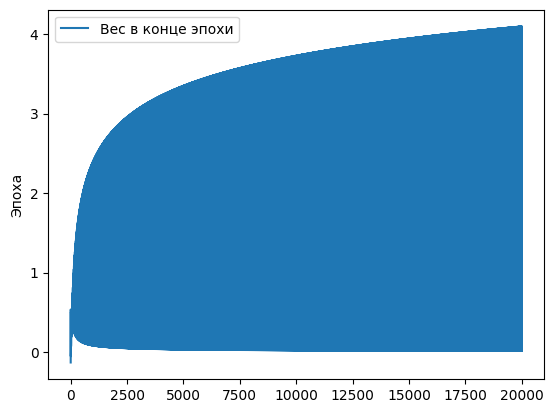

In [7]:
plt.plot(epoch_weights, label="Вес в конце эпохи")
plt.ylabel("Эпоха")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

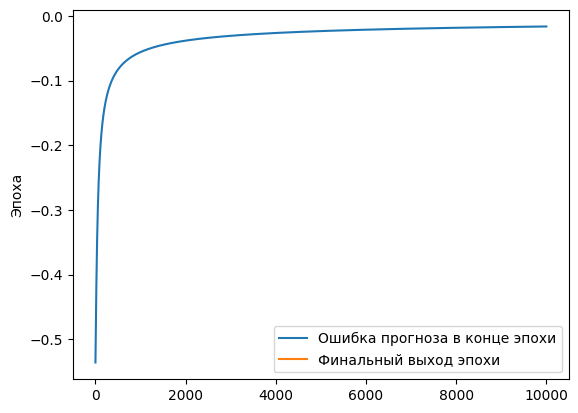

In [8]:
final_errors = np.array(output_errors["negative"])
final_errors = final_errors.reshape(len(final_errors))

plt.plot(final_errors, label="Ошибка прогноза в конце эпохи")
plt.plot(final_outputs, label="Финальный выход эпохи")
plt.ylabel("Эпоха")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

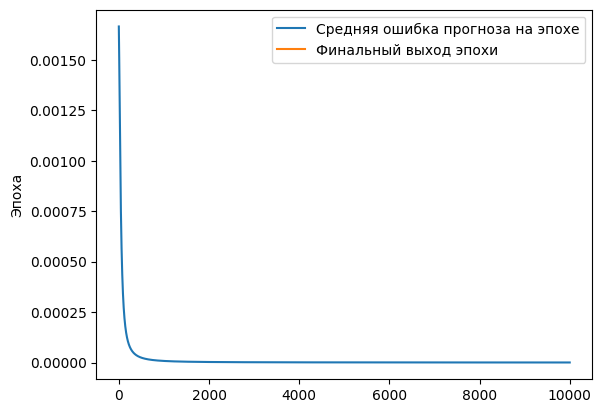

In [9]:
plt.plot(epoch_errors, label="Средняя ошибка прогноза на эпохе")
plt.plot(final_outputs, label="Финальный выход эпохи")
plt.ylabel("Эпоха")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

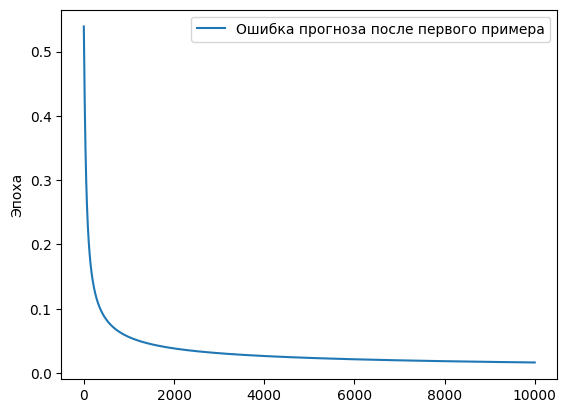

In [10]:
start_errors = np.array(output_errors["positive"])
start_errors = start_errors.reshape(len(start_errors))

plt.plot(start_errors, label="Ошибка прогноза после первого примера")
plt.ylabel("Эпоха")
plt.legend()
plt.show

In [11]:
# значение матрицы весов
simple_perceptron.weights

array([[4.09680586]])

In [12]:
# пример прогнозов
print(simple_perceptron.predict([100,0]))
print(simple_perceptron.predict([-100,0]))


ValueError: ignored

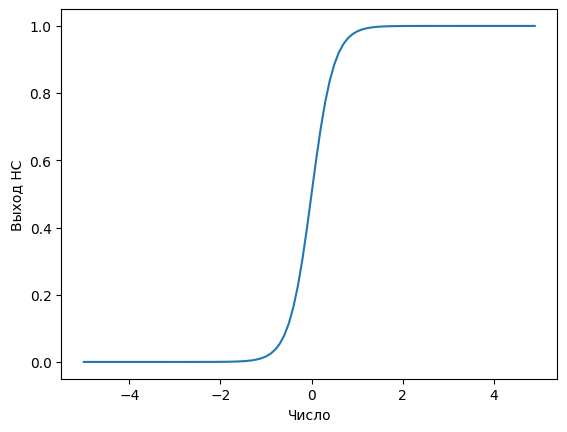

In [13]:
# как выглядит выход перцептрона в зависимости от входа

outputs = []
for i in np.arange(-5.0, 5.0, 0.1):
    output=simple_perceptron.predict([i])
    outputs.append(output[0])
plt.plot(np.arange(-5.0, 5.0, 0.1),outputs)
plt.xlabel("Число")
plt.ylabel("Выход НС")
plt.show()

In [14]:
# задача логического или
# устананавливаем количество входов и выходов
input_count = 2
output_count = 1

# устанавливаем значение скорости обучения
learning_rate  = 0.1

# создаем персептрон
simple_perceptron = Perceptron(input_count, output_count, learning_rate)
# проводим обучение персептрона
x = [[-1,-1],
     [-1,1],
     [1,-1],
     [1,1]]
y = [[0],
     [1],
     [1],
     [1]]
for _ in range(0, 1000):
    # показываем первый пример
    simple_perceptron.train(x[0],y[0])
    simple_perceptron.train(x[1],y[1])
    simple_perceptron.train(x[2],y[2])
    simple_perceptron.train(x[3],y[3])

print(simple_perceptron.predict(x[0]))
print(simple_perceptron.predict(x[1]))
print(simple_perceptron.predict(x[2]))
print(simple_perceptron.predict(x[3]))

[[0.03834677]]
[[0.49685551]]
[[0.50314449]]
[[0.96165323]]


In [15]:
# создание нейронной сети
# устанавливаем количество входов и выходов
input_count = 1
output_count = 1

# устанавливаем значение скорости обучения
learning_rate = 0.1

# создаем персептрон
simple_perceptron = Perceptron(input_count, output_count, learning_rate)
simple_perceptron.weights

# проводим обучение персепторона
for epoch in range(10000):
  # показываем первый пример
    simple_perceptron.train([1.0], [i])
  # показываем второй пример
    simple_perceptron.train([0.5], [i])
 # показываем третий пример
    simple_perceptron.train([-1.0], [i])


In [16]:
print(simple_perceptron.predict([1.0]))
print(simple_perceptron.predict([-0.5]))
print(simple_perceptron.predict([-1.0]))

[[0.99999891]]
[[0.0010409]]
[[1.08573815e-06]]


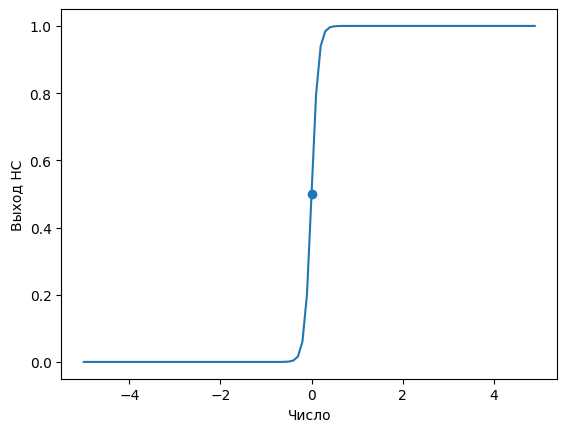

In [17]:
outputs = []
for i in np.arange(-5.0,5.0,0.1):
    output=simple_perceptron.predict([i])
    outputs.append(output[0])
plt.plot(np.arange(-5.0,5.0,0.1),outputs)
plt.scatter(0,simple_perceptron.predict([0]) )
plt.xlabel("Число")
plt.ylabel("Выход НС")
plt.show()

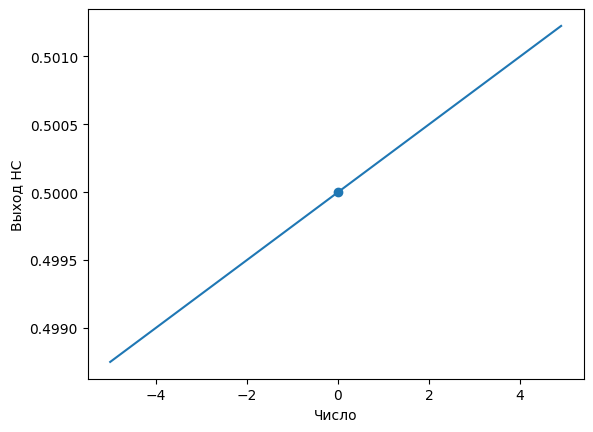

In [18]:
outputs = []
for i in np.arange(-5.0,5.0,0.1):
    simple_perceptron.weights = [[0.001]]
    output=simple_perceptron.predict([i])
    outputs.append(output[0])
plt.plot(np.arange(-5.0,5.0,0.1),outputs)
plt.scatter(0,simple_perceptron.predict([0]) )
plt.xlabel("Число")
plt.ylabel("Выход НС")
plt.show()

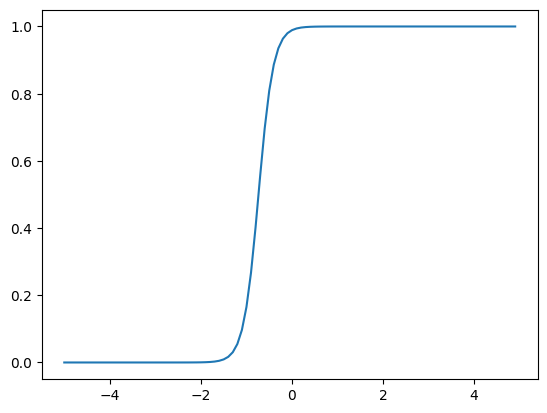

In [19]:
# создание нейронной сети со смещением
# устанавливаем количество входов и выходов
input_nodes = 2
output_nodes = 1

# устанавливаем значение скорости обучения
learning_rate = 0.3

# создаем персептрон
simple_perceptron = Perceptron(input_nodes, output_nodes, learning_rate)

# проводим обучение персепторона
for _ in range(0, 1000):
  # показываем первый пример
    simple_perceptron.train([1.0, 1], [1])
  # показываем второй пример
    simple_perceptron.train([-0.5, 1], [1])
 # показываем третий пример
    simple_perceptron.train([-1.0, 1], [0])

outputs = []
for i in np.arange(-5.0, 5.0, 0.1):
    output = simple_perceptron.predict([i, 1])
    outputs.append(output[0])
plt.plot(np.arange(-5.0, 5.0, 0.1), outputs)
plt.show()


In [20]:
# обучение нейронной сети со смещением
# обучение однослойного персептрона
# создание класса

class Perceptron_V2:
  #конструктор ИНС
    def __init__(self, input_count, output_count, learning_rate):
        self.input_count = input_count + 1
        self.output_count = output_count


        # создание весов нейронной сети
        # указываем центр распределения весов (0),
        # потом стандартное отклонение pow(self.input_count, -0.5)
        # после форму матрицы со случайными значениями(количество выходов, количество входов)
        self.weights = np.random.normal(0.0, pow(self.input_count, -0.5), (self.output_count, self.input_count))

        self.learning_rate = learning_rate
        self.activation_function = scipy.special.expit

        # обучение нейронной сети
    def train(self, inputs_list, targets_list):
        # создание матрицы из входных и выходных значений
        inputs = np.array(inputs_list + [1], ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # считаем сигнал, который поступает в нейроны
        # self.weights = [[0.69132613]], inputs = [[1]]
        # final_inputs = [[0.69132613]]
        final_inputs = np.dot(self.weights, inputs)

        # считаем сигналы, которые испускают нейроны
        # final_outputs = [[0.66626187]]
        final_outputs = self.activation_function(final_inputs)

        # считаем ошибку прогноза
        # output_errors = [[0.33373813]]
        output_errors = targets - final_outputs

        # изменение веса равно[[0.0074209]]
        self.weights += self.learning_rate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                                      np.transpose(inputs))
          # прогнозирование нейронной сетью
    def predict(self, inputs_list):
        # создание матрицы из входных значений
        inputs = np.array(inputs_list + [1], ndmin=2).T
        # считаем сигнал, который поступает в нейроны
        final_inputs = np.dot(self.weights, inputs)
        # считаем сигнал, который испускают нейроны
        final_outputs = self.activation_function(final_inputs)

        return final_outputs


In [21]:
# создание нейронной сети со смещением
# устанавливаем количество входов и выходов
inputs_node = 1
outputs_node = 1

# устанавливаем значение скорости обучения
learning_rate = 0.3

# создаем персептрон
simple_perceptron = Perceptron_V2(input_nodes, output_nodes, learning_rate)

# проводим обучение персепторона
for _ in range(0, 1000):
    simple_perceptron.train([1.0], [1])
    simple_perceptron.train([-0.5], [1])
    simple_perceptron.train([-1.0], [0])

outputs = []
for i in np.arange(-5.0 , 5.0, 0.1):
    output = simple_perceptron.predict([i])
    outputs.append(output[0])
plt.plot(np.arange(-5.0, 5.0, 0.1), outputs)
plt.show()

ValueError: ignored

In [23]:
# логическое И
from matplotlib import pylab
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show

TypeError: ignored

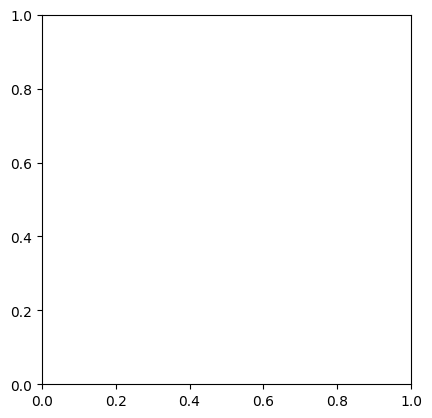

In [24]:
# без смещения
# устанавливаем количество входов и выходов
inputs_node = 2
outputs_node = 1

# устанавливаем значение скорости обучения
learning_rate = 0.3

# создаем персептрон
simple_perceptron = Perceptron(input_nodes, output_nodes, learning_rate)

# проводим обучение персепторона
for _ in range(0, 1000):
    simple_perceptron.train([1, 1], [1])
    simple_perceptron.train([1, -1], [0])
    simple_perceptron.train([-1, 1], [0])
    simple_perceptron.train([-1, -1], [0])

outputs = []
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(2.0, 2.0, 0.1)
X1, X2 = meshgrid(x1, x2)
Z = []
for x2 in X2[:, 0]:
    t = []
    for x1 in X1[0, :]:
        output = simple_perceptron.predict([x1, x2])
        t.append(output[0, 0])
    Z.append(t)
Z = np.array(Z)
im = imshow(Z, cmap=cm.RdBu, extent=[-2, 2, 2,-2]) # drawing the function
plt.scatter(-1, -1)
plt.scatter(-1, 1)
plt.scatter(1, -1)
plt.scatter(1, 1)
# adding the Contour lines the label
# cset = contour(Z, np.arrange(-1, 1.5, 0.2), linewidth=2, cmap=cm.Set2)
# clabel(cset, inline=True,fmt='%x,1f', fontsize=10)
# colorbar(im) # adding the color bar on the right
# Latex fashion title
title('')
plt.ylim(-2, 2)
print(simple_perceptron.predict([-1, -1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([1, 1]))

TypeError: ignored

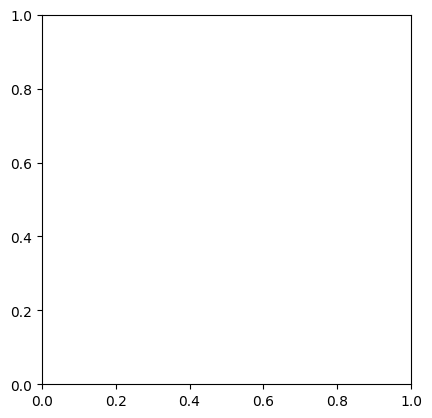

In [25]:
# со смещением
# создание нейронной сети со смещением
# устанавливаем количество входов и выходов
inputs_node = 1
outputs_node = 1

# устанавливаем значение скорости обучения
learning_rate = 0.3

# создаем персептрон
simple_perceptron = Perceptron_V2(input_nodes, output_nodes, learning_rate)

# проводим обучение персепторона
for _ in range(0, 1000):
    simple_perceptron.train([1, 1], [1])
    simple_perceptron.train([1, -1], [0])
    simple_perceptron.train([-1, 1], [0])
    simple_perceptron.train([-1, -1], [0])
outputs = []
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(2.0, 2.0, 0.1)
X1, X2 = meshgrid(x1, x2)
Z = []
for x2 in X2[:, 0]:
    t = []
    for x1 in X1[0, :]:
        output = simple_perceptron.predict([x1, x2])
        t.append(output[0, 0])
    Z.append(t)
Z = np.array(Z)
im = imshow( Z, cmap=cm.RdBu, extent=[-2, 2, 2,-2]) # drawing the function
plt.scatter(-1, -1)
plt.scatter(-1, 1)
plt.scatter(1, -1)
plt.scatter(1, 1)
# adding the Contour lines the label
# cset = contour(Z, np.arrange(-1, 1.5, 0.2), linewidth=2, cmap=cm.Set2)
# clabel(cset, inline=True,fmt='%x,1f', fontsize=10
colorbar(im) # adding the color bar on the right
# Latex fashion title
title('')
plt.ylim(-2, 2)
print(simple_perceptron.predict([-1, -1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([1, 1]))


ValueError: ignored

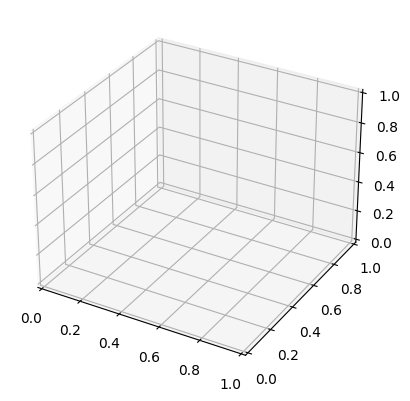

In [26]:
# визуализация в техмерном виде

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                      cmap=cm.RdBu, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(10)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

TypeError: ignored

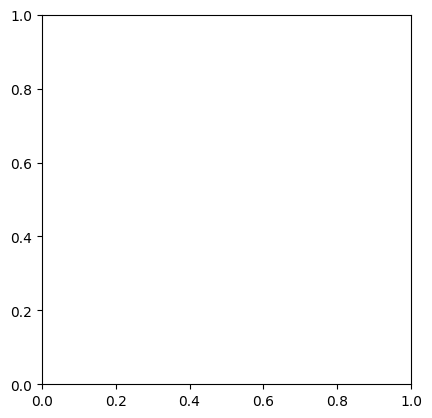

In [27]:
# задача исключающего или
# устанавливаем количество входов и выходов
inputs_node = 1
outputs_node = 1

# устанавливаем значение скорости обучения
learning_rate = 0.3

# создаем персептрон
simple_perceptron = Perceptron_V2(input_nodes, output_nodes, learning_rate)

# проводим обучение персепторона
for i  in range(0, 10):
    if i % 4 == 0:
        simple_perceptron.train([1, 1], [1])
    elif i % 3 == 0:
        simple_perceptron.train([1, -1], [0])
    elif i % 2 == 0:
        simple_perceptron.train([-1, 1], [0])
    else:
        simple_perceptron.train([-1, -1], [0])
outputs = []
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(2.0, 2.0, 0.1)
X1, X2 = meshgrid(x1, x2)
Z = []
for x2 in X2[:, 0]:
    t = []
    for x1 in X1[0, :]:
        output = simple_perceptron.predict([x1, x2])
        t.append(output[0, 0])
    Z.append(t)
Z = np.array(Z)
im = imshow( Z, cmap=cm.RdBu, extent=[-2, 2, 2,-2]) # drawing the function
plt.scatter(-1, -1)
plt.scatter(-1, 1)
plt.scatter(1, -1)
plt.scatter(1, 1)
# adding the Contour lines the label
# cset = contour(Z, np.arrange(-1, 1.5, 0.2), linewidth=2, cmap=cm.Set2)
# clabel(cset, inline=True,fmt='%x,1f', fontsize=10)
colorbar(im) # adding the color bar on the right
# Latex fashion title
title('')
plt.ylim(-2, 2)
plt.show()
print(simple_perceptron.predict([-1, -1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([1, 1]))



In [28]:
# многослрйный нейрон
# neural network class definition
class MultyLayerPerceptron_V2:
    def __init__(self, input_count, hidden_count, output_count, learning_rate):
        self.input_count = input_count
        self.hidden_count = hidden_count
        self.output_count = output_count
        # веса внутри массива w_i_j связываем i-ый нейрон с j нейроном следующего уровня
        self.w_inp_hid = np.random.normal(0.0, pow(self.input_count, -0.5), (self.hidden_count, self.input_count + 1))
        self.w_hid_out = np.random.normal(0.0, pow(self.input_count, -0.5), (self.output_count, self.input_count + 1))


        self.learning_rate = learning_rate
        self.activation_function = scipy.special.expit

    # обучение нейронной сети
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list + [1], ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # считаем сигнал, который поступает в нейроны скрытого слоя
        hidden_inputs = np.dot(self.w_inp_hid, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        # добавляем единичный нейрон к скрытому слою
        hidden_outputs = np.append(hidden_outputs, [[1]], axis = 0)

        # считаем сигнал, который поступает в нейроны выходного слоя
        final_inputs = np.dot(self.w_hid_out, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        # считаем ошибки
        output_errors = targets - final_outputs
        # определяем ошибки, которые приходятся на каждый нейрон
        hidden_errors = np.dot(self.w_hid_out.T, output_errors)
        # обновляем веса
        self.w_hid_out += self.learning_rate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                                     np.transpose(hidden_outputs))
        hidden_errors = hidden_errors[0: (hidden_errors.shape[0] - 1), :]
        hidden_outputs = hidden_outputs[0: (hidden_errors.shape[0] - 1), :]
        self.w_hid_out += self.learning_rate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                                     np.transpose(inputs))
    def predict(self, inputs_list):
        inputs = np.array(inputs_list + [1], ndmin=2).T

        # считаем сигнал, который поступает в нейрон скрытого слоя
        hidden_inputs = np.dot(self.w_inp_hid, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        # добавляем единичный нейрон к скрытому слою
        final_inputs = np.dot(self.w_hid_out, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [29]:
# устанавливаем количество входов и выходов
inputs_node = 2
outputs_node = 1
hidden_count = 20

# устанавливаем значение скорости обучения
learning_rate = 0.01

# создаем персептрон
simple_perceptron = MultyLayerPerceptron_V2(input_nodes, hidden_count, output_nodes, learning_rate)

# проводим обучение персепторона
for i  in range(10000):
    simple_perceptron.train([1, 1],  [0])
    simple_perceptron.train([1, -1], [1])
    simple_perceptron.train([-1, 1], [1])
    simple_perceptron.train([-1, -1],[0])

outputs = []
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(-2.0, 2.0, 0.1)
X1, X2 = meshgrid(x1, x2)
Z = []
for x2 in X2[:, 0]:
    t = []
    for x1 in X1[0, :]:
        output = simple_perceptron.predict([x1, x2])
        t.append(output[0, 0])
    Z.append(t)
Z = np.array(Z)
im = imshow( Z, cmap=cm.RdBu, extent=[-2, 2, 2,-2]) # drawing the function
plt.scatter(-1, -1)
plt.scatter(-1, 1)
plt.scatter(1, -1)
plt.scatter(1, 1)
# adding the Contour lines the label
# cset = contour(Z, np.arrange(-1, 1.5, 0.2), linewidth=2, cmap=cm.Set2)
# clabel(cset, inline=True,fmt='%x,1f', fontsize=10)
colorbar(im) # adding the color bar on the right
# Latex fashion title
title('')
plt.ylim(-2, 2)
plt.show()
print(simple_perceptron.predict([1, 1]))
print(simple_perceptron.predict([1, -1]))
print(simple_perceptron.predict([-1, 1]))
print(simple_perceptron.predict([-1, -1]))



ValueError: ignored

In [30]:
np.random.normal(0.0, pow(input_count, -0.5), (hidden_count, input_count + 1))

array([[-0.40341014, -2.17424729],
       [-0.24714464, -0.06569778],
       [ 3.86438425, -1.46425902],
       [ 0.90598068, -1.06669929],
       [ 1.2790777 , -1.51725677],
       [ 0.34065604,  0.68177692],
       [ 0.94612026, -2.50371035],
       [-1.46755534, -0.1643368 ],
       [ 0.94862457,  0.35939389],
       [ 0.84790492,  0.28902651],
       [ 1.37507027,  1.16904557],
       [-0.09767845,  0.98377716],
       [ 0.36501803,  1.50290188],
       [ 1.64745495,  0.65188894],
       [ 0.57233896, -2.21631564],
       [-0.37541869,  0.33553787],
       [-1.57666236, -0.85046782],
       [-0.53730818, -0.4817813 ],
       [-1.72503765,  1.81467192],
       [ 0.00644209,  0.03856528]])

In [31]:
np.random.normal(0.0, pow(hidden_count, -0.5), (output_count, hidden_count + 1))

array([[ 0.12856318,  0.26569348,  0.06279987, -0.24782017,  0.14874945,
        -0.31514159,  0.34299273,  0.72717904,  0.0270897 ,  0.0703649 ,
        -0.33822324,  0.11556034,  0.08245769, -0.37338805,  0.10554128,
         0.03553665, -0.14054931,  0.1260572 , -0.06878986,  0.03159843,
        -0.04795641]])

In [32]:
input_count = 2
hidden_count = 2
output_count = 1
learning_rate = 0.3
mlp = MultyLayerPerceptron_V2(input_count, hidden_count, output_count, learning_rate)
mlp.predict([1, 0])

ValueError: ignored

In [33]:
# устанавливаем количество входов и выходов
inputs_count = 1
outputs_count = 2
hidden_count = 1

# устанавливаем значение скорости обучения
learning_rate = 0.3

# создаем персептрон
mlp = MultyLayerPerceptron_V2(input_count, hidden_count, output_count, learning_rate)

# проводим обучение персепторона
for _ in range(0, 1000):
    # показываем первый пример
    mlp.train([1.0], [1])
    # показываем второй пример
    mlp.train([0], [0])
    # показываем третий пример
    mlp.train([-1.0],[1])

outputs = []
for i  in np.arange(-5.0, 5.0, 0.1):
    outputs = mlp.predict([i])
    outputs.append(output[0])
plt.plot(np.arange(-5.0, 5.0, 0.1), outputs)
plt.show()

ValueError: ignored